Dota2 analyzer

In [133]:
import numpy as np
import pandas as pd
import math
import matplotlib
import matplotlib.pyplot as plt

In [188]:
# https://www.opendota.com/matches/5333524810
df = pd.read_json("parsed_matches/5333524810_1023147090.jsonlines", lines=True)
df.head()

,time,type,value,attackername,targetname,sourcename,targetsourcename,attackerhero,targethero,attackerillusion,...,z,entityleft,ehandle,player1,player2,slow_duration,xp_reason,stun_duration,tracked_death,tracked_sourcename
0,-1021,DOTA_COMBATLOG_GAME_STATE,2.0,dota_unknown,dota_unknown,dota_unknown,dota_unknown,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1021,DOTA_COMBATLOG_GAME_STATE,9.0,dota_unknown,dota_unknown,dota_unknown,dota_unknown,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-1021,player_slot,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-1021,player_slot,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-1021,player_slot,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [170]:
# top 10 most hapenned events
df["type"].value_counts()[:10]

actions                           85207
interval                          30430
DOTA_COMBATLOG_DAMAGE             24021
DOTA_COMBATLOG_MODIFIER_ADD       11286
DOTA_COMBATLOG_MODIFIER_REMOVE    11139
DOTA_COMBATLOG_XP                  3131
DOTA_COMBATLOG_DEATH               2871
DOTA_COMBATLOG_GOLD                2266
DOTA_COMBATLOG_ABILITY             1474
DOTA_COMBATLOG_ITEM                1003
Name: type, dtype: int64

In [184]:
intervals = df[(df["type"] == "interval") & (df["time"] >= 0) & (df["time"] < 1000)]
intervals = intervals[["time", "type", "unit", "slot", "gold", "lh", "xp", "x", "y", "hero_id", "level"]].dropna()
intervals.head()

,time,type,unit,slot,gold,lh,xp,x,y,hero_id,level
13246,0,interval,CDOTA_Unit_Hero_Furion,0.0,0.0,0.0,0.0,96.0,148.0,53.0,1.0
13247,0,interval,CDOTA_Unit_Hero_Beastmaster,1.0,0.0,0.0,0.0,100.0,134.0,38.0,1.0
13248,0,interval,CDOTA_Unit_Hero_BountyHunter,2.0,0.0,0.0,0.0,100.0,160.0,62.0,1.0
13249,0,interval,CDOTA_Unit_Hero_Nyx_Assassin,3.0,0.0,0.0,0.0,102.0,156.0,88.0,1.0
13250,0,interval,CDOTA_Unit_Hero_Shredder,4.0,0.0,0.0,0.0,110.0,112.0,98.0,1.0


In [185]:
intervals[["x", "y", "time"]].describe()

,x,y,time
count,10000.000000,10000.000000,10000.000000
mean,122.587000,131.219600,499.500000
std,31.278415,26.581934,288.689425
min,70.000000,74.000000,0.000000
25%,94.000000,114.000000,249.750000
50%,122.000000,130.000000,499.500000
75%,144.000000,156.000000,749.250000
max,186.000000,186.000000,999.000000


Radiant team

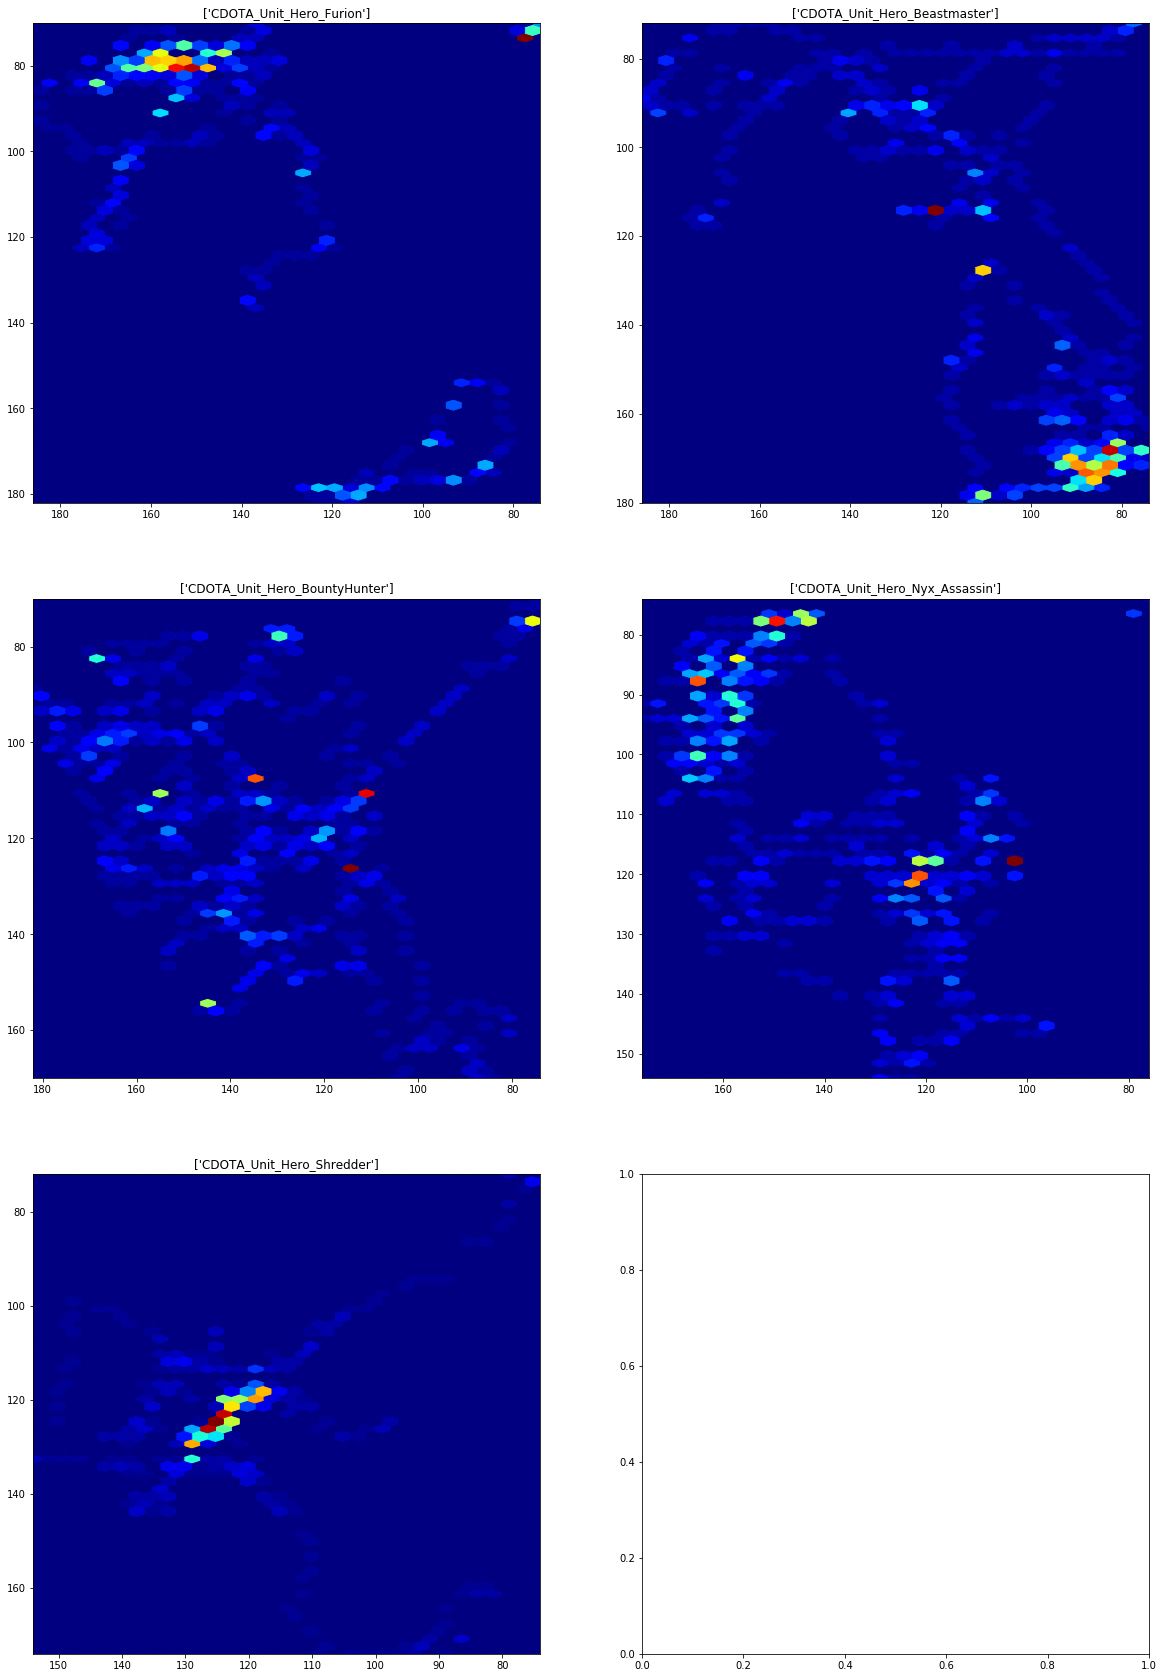

In [186]:
slots = intervals["slot"].unique()
fig, axs = plt.subplots(3, 2, figsize=(20, 30))

for i in range(5):
    df_ = intervals[intervals["slot"] == slots[i]]
    unit = df_["unit"].unique()
    X = df_["x"]
    Y = df_["y"]
    ax = axs[math.floor(i/2), i%2]
    ax.set_title("{}".format(unit))
    hb = ax.hexbin(Y, X, gridsize=(32,32), cmap="jet")
    ax.axis([np.max(Y), np.min(Y), np.max(X), np.min(X)])

plt.show()

Dire team

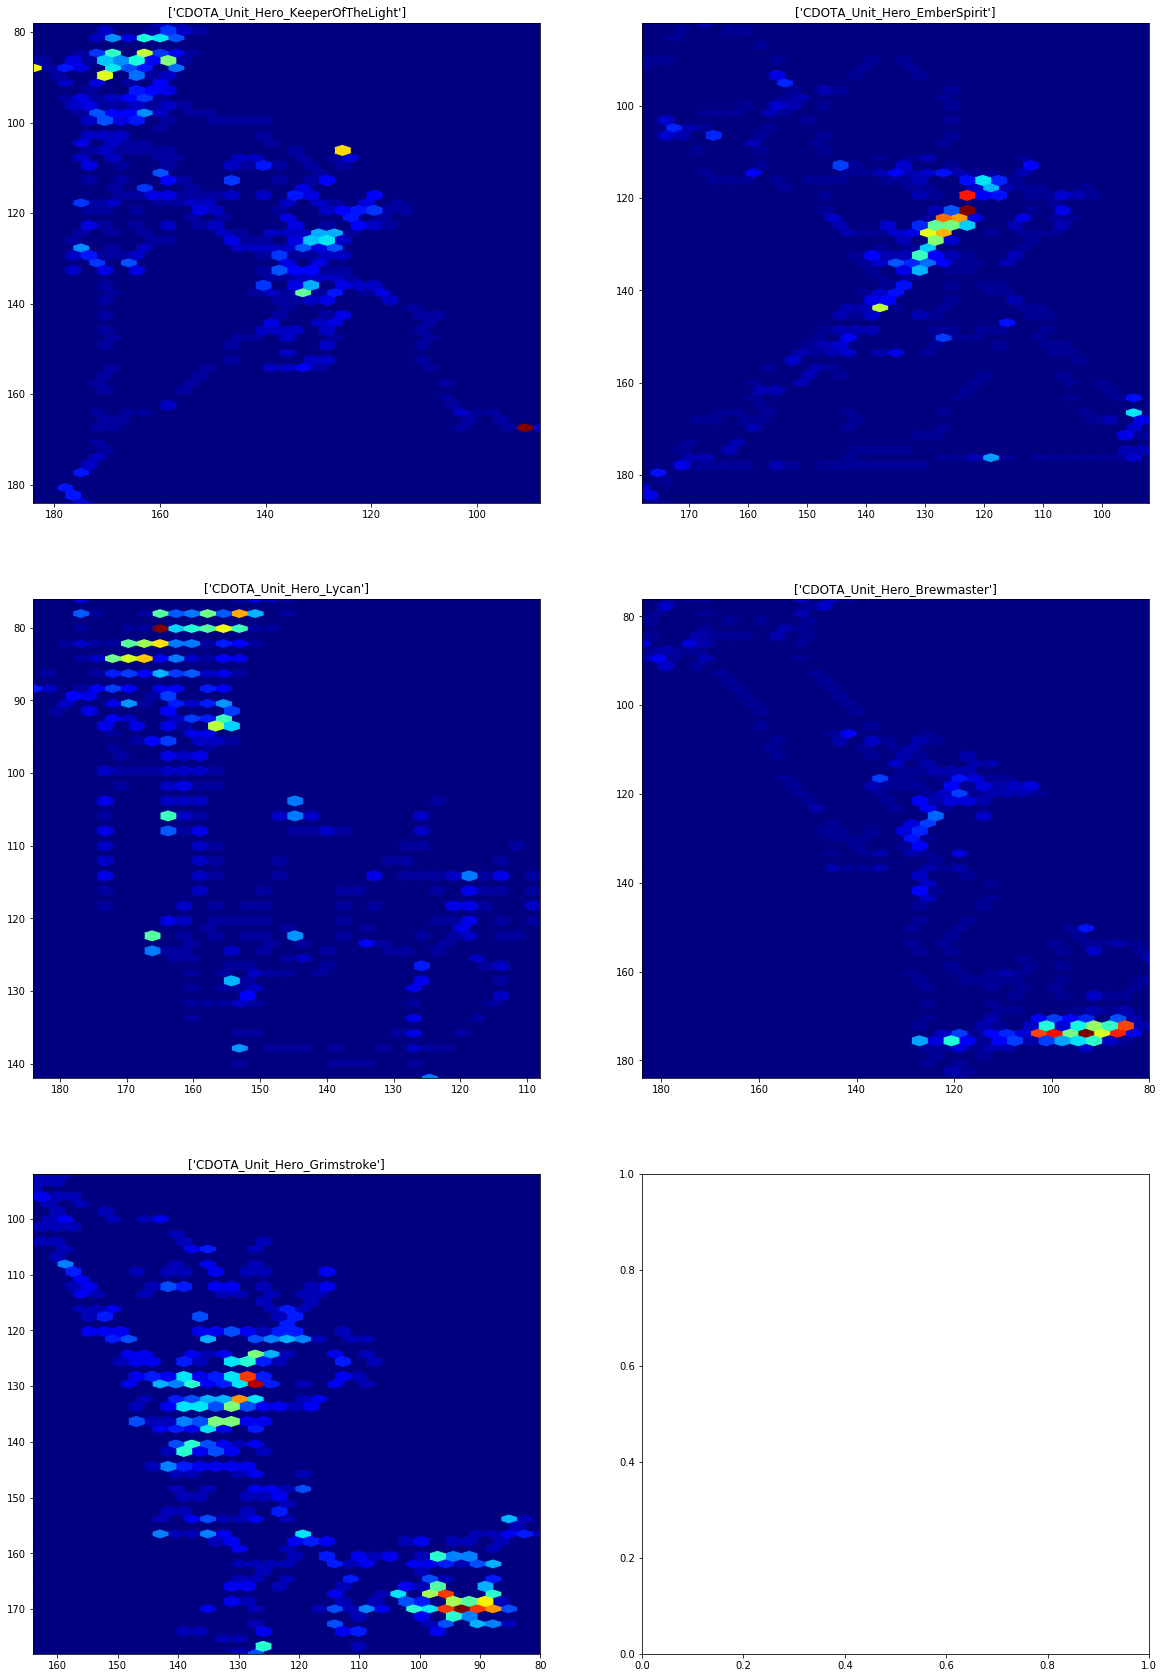

In [187]:
slots = intervals["slot"].unique()
fig, axs = plt.subplots(3, 2, figsize=(20, 30))

for i in range(5):
    df_ = intervals[intervals["slot"] == slots[i + 5]]
    unit = df_["unit"].unique()
    X = df_["x"]
    Y = df_["y"]
    ax = axs[math.floor(i/2), i%2]
    ax.set_title("{}".format(unit))
    hb = ax.hexbin(Y, X, gridsize=(32,32), cmap="jet")
    ax.axis([np.max(Y), np.min(Y), np.max(X), np.min(X)])

plt.show()

In [120]:
intervals[intervals["slot"] == 0]

,time,unit,slot,x,y,hero_id,level
9503,-89,CDOTA_Unit_Hero_Furion,0.0,74.0,74.0,53.0,1.0
9575,-88,CDOTA_Unit_Hero_Furion,0.0,74.0,74.0,53.0,1.0
9636,-87,CDOTA_Unit_Hero_Furion,0.0,74.0,76.0,53.0,1.0
9680,-86,CDOTA_Unit_Hero_Furion,0.0,74.0,78.0,53.0,1.0
9720,-85,CDOTA_Unit_Hero_Furion,0.0,74.0,80.0,53.0,1.0
...,...,...,...,...,...,...,...
174630,2017,CDOTA_Unit_Hero_Furion,0.0,160.0,168.0,53.0,22.0
174775,2018,CDOTA_Unit_Hero_Furion,0.0,160.0,168.0,53.0,22.0
174902,2019,CDOTA_Unit_Hero_Furion,0.0,162.0,168.0,53.0,22.0
174994,2020,CDOTA_Unit_Hero_Furion,0.0,162.0,168.0,53.0,22.0


In [121]:
def distance(p1, p2):
    return math.sqrt((p2[0] - p1[0])**2 + (p2[1] - p1[1])**2)

In [132]:
info = {}
def parse_row(row):
    slot = row["slot"]
    if slot not in info:
        info[slot] = {
            "last_point": None,
            "distance": 0
        }
    
    if not info[slot]["last_point"]:
        info[slot]["last_point"] = (row["x"], row["y"])
        return
    point = (row["x"], row["y"])
    info[slot]["distance"] = info[slot]["distance"] + distance(point, info[slot]["last_point"]);
    info[slot]["last_point"] = point
    
    
for _, row in intervals.iterrows():
    parse_row(row)
    
print(info)

{0.0: {'last_point': (162.0, 168.0), 'distance': 5684.965202814948}, 1.0: {'last_point': (80.0, 82.0), 'distance': 4446.380089873169}, 2.0: {'last_point': (80.0, 80.0), 'distance': 5612.836761636627}, 3.0: {'last_point': (74.0, 80.0), 'distance': 5393.108994647283}, 4.0: {'last_point': (84.0, 84.0), 'distance': 4833.486833765546}, 5.0: {'last_point': (84.0, 80.0), 'distance': 5299.877236065756}, 6.0: {'last_point': (84.0, 82.0), 'distance': 5687.865155159751}, 7.0: {'last_point': (84.0, 84.0), 'distance': 4172.217405940133}, 8.0: {'last_point': (80.0, 84.0), 'distance': 4646.137552411618}, 9.0: {'last_point': (88.0, 84.0), 'distance': 4883.796379804057}}
